In [147]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

### Read a CSV file using Pandas from an URL path :

In [148]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [149]:
df.tail(10)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
195,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,13415
196,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985
197,-1,74,volvo,gas,std,four,wagon,rwd,front,104.3,...,141,mpfi,3.78,3.15,9.5,114,5400,24,28,16515
198,-2,103,volvo,gas,turbo,four,sedan,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18420
199,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.3,...,130,mpfi,3.62,3.15,7.5,162,5100,17,22,18950
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470
204,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625


### Add a name for each of the column :

In [150]:
headers = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors", "body-style", \
           "drive-wheels", "engine-location", "wheel-base", "length", "width", "height", "curb-weight", "engine-type", \
           "num-of-cylinders", "engine-size", "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", \
           "peak-rpm", "city-mpg", "highway-mpg", "price" ]

df.columns = headers

In [151]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Describe Data types and get info of the DataFrame :

In [152]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [153]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [154]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [155]:
df[["make", "compression-ratio"]].describe(include ='all')

,make,compression-ratio
count,205,205.000000
unique,22,NaN
top,toyota,NaN
freq,32,NaN
mean,NaN,10.142537
std,NaN,3.972040
min,NaN,7.000000
25%,NaN,8.600000
50%,NaN,9.000000
75%,NaN,9.400000


In [156]:
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

### Manipulating data :

In [157]:
df['make'].head()

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
Name: make, dtype: object

In [158]:
df['symboling']+1

0      4
1      4
2      2
3      3
4      3
      ..
200    0
201    0
202    0
203    0
204    0
Name: symboling, Length: 205, dtype: int64

### Dealing with missing values

In [159]:
df.replace("?", np.nan, inplace = True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [160]:
missing_data = df.isnull()
missing_data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [161]:
for column in missing_data.columns.values.tolist() :
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In [162]:
max_frq_nod = df["num-of-doors"].value_counts().idxmax()
max_frq_nod

'four'

In [163]:
df["num-of-doors"].replace(np.nan, max_frq_nod, inplace=True)

Drop the row with a missing value in 'price' column :

In [164]:
df.dropna(subset=["price"], axis = 0, inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Replace missing values "NaN" in "normalized-losses" column with the average of the column :

In [165]:
avg_nl = df["normalized-losses"].astype("float").mean(axis=0)
avg_nl

122.0

In [166]:
df["normalized-losses"].replace(np.nan, avg_nl, inplace = True)
df["normalized-losses"]

0      122
1      122
2      122
3      164
4      164
      ... 
196     95
197     95
198     95
199     95
200     95
Name: normalized-losses, Length: 201, dtype: object

### Data formating 

We want to convert data from "city-mpg" in L/100 km :

In [167]:
df['city-mpg'] = 235/df['city-mpg']
df['city-mpg']

0      11.190476
1      11.190476
2      12.368421
3       9.791667
4      13.055556
         ...    
196    10.217391
197    12.368421
198    13.055556
199     9.038462
200    12.368421
Name: city-mpg, Length: 201, dtype: float64

Rename the column "city-mpg" by "city-L/100km" :

In [168]:
df.rename(columns = {"city-mpg":"city-L/100km"}, inplace = True)
df[["city-L/100km"]]

,city-L/100km
0,11.190476
1,11.190476
2,12.368421
3,9.791667
4,13.055556
...,...
196,10.217391
197,12.368421
198,13.055556
199,9.038462


Convert the data type of column "price" from 'object' to 'float' :

In [169]:
df["price"] = df["price"].astype("int")

In [170]:
avg_horsepower = df['horsepower'].astype('float').mean(axis=0)
avg_horsepower

103.39698492462311

In [171]:
df['horsepower'].replace(np.nan, avg_horsepower, inplace=True)
df['horsepower'] = df['horsepower'].astype("float")

In [172]:
avg_pk_rpm = df['peak-rpm'].astype('float').mean(axis=0)
avg_pk_rpm

5117.587939698493

In [173]:
df['peak-rpm'].replace(np.nan, avg_pk_rpm, inplace=True)
df['peak-rpm'] = df['peak-rpm'].astype('float')
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-L/100km         float64
highway-mpg            int64
price                  int64
dtype: object

In [174]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-L/100km,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,11.190476,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,12.368421,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,9.791667,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,13.055556,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,10.217391,28,16845
197,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,12.368421,25,19045
198,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,13.055556,23,21485
199,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,9.038462,27,22470


### Data Normalization

Normalization of "length" feature

Simple Feature scaling :

In [175]:
df["length"] = df["length"]/df["length"].max()
df["length"]

0      0.811148
1      0.811148
2      0.822681
3      0.848630
4      0.848630
         ...   
196    0.907256
197    0.907256
198    0.907256
199    0.907256
200    0.907256
Name: length, Length: 201, dtype: float64

Min - Max :

In [176]:
df["length"] = (df["length"]-df["length"].min()) / (df["length"].max()-df["length"].min())
df["length"]

0      0.413433
1      0.413433
2      0.449254
3      0.529851
4      0.529851
         ...   
196    0.711940
197    0.711940
198    0.711940
199    0.711940
200    0.711940
Name: length, Length: 201, dtype: float64

Z-score :

In [177]:
df["length"] = (df["length"]-df["length"].mean()) / df["length"].std()
df["length"]

0     -0.438315
1     -0.438315
2     -0.243544
3      0.194690
4      0.194690
         ...   
196    1.184775
197    1.184775
198    1.184775
199    1.184775
200    1.184775
Name: length, Length: 201, dtype: float64

### Binning

We want 3 bins (low, medium, hight) of equal binwidth of price feature :

In [178]:
bins = np.linspace(min(df["price"]), max(df["price"]), 4)
bins

array([ 5118.        , 18545.33333333, 31972.66666667, 45400.        ])

In [179]:
group_names = ["Low", "Medium", "Hight"]
df["price_binned"] = pd.cut(df["price"], bins, labels=group_names, include_lowest=True)
df[["price", "price_binned"]].head(20)

,price,price_binned
0,13495,Low
1,16500,Low
2,16500,Low
3,13950,Low
4,17450,Low
5,15250,Low
6,17710,Low
7,18920,Medium
8,23875,Medium
9,16430,Low


In [180]:
df["price_binned"].value_counts()

Low       171
Medium     18
Hight      12
Name: price_binned, dtype: int64

Text(0.5, 1.0, 'Price binned')

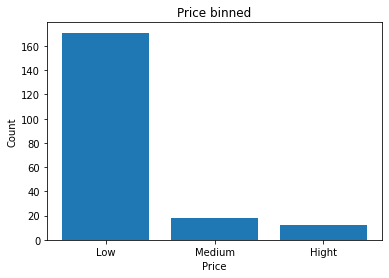

In [181]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(group_names, df["price_binned"].value_counts())

plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Price binned")

### Dummy variables 

In [182]:
pd.get_dummies(df["fuel-type"])

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
196,0,1
197,0,1
198,0,1
199,1,0


In [183]:
make_counts = df["make"].value_counts().to_frame()
make_counts.rename(columns={'make':'count'}, inplace=True)
make_counts

,count
toyota,32
nissan,18
mazda,17
mitsubishi,13
honda,13
subaru,12
volkswagen,12
peugot,11
volvo,11
dodge,9


<AxesSubplot:xlabel='fuel-type', ylabel='price'>

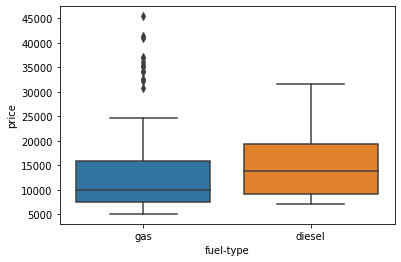

In [184]:
sns.boxplot(x = 'fuel-type', y = 'price', data = df)

Text(0, 0.5, 'Price car')

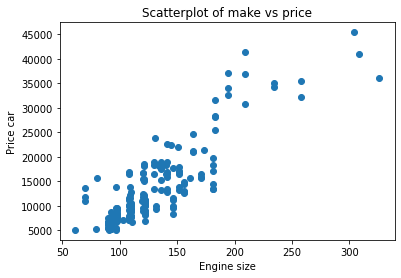

In [185]:
x = df["engine-size"]
y = df["price"]
plt.scatter(x,y)

plt.title('Scatterplot of make vs price')
plt.xlabel('Engine size')
plt.ylabel('Price car')

In [186]:
df.to_csv("automobile.csv", index = None)

### Group By

In [187]:
df_test = df[['make', 'num-of-doors', 'price']]

In [188]:
df_grpb = df_test.groupby(['make', 'num-of-doors'], as_index=False).mean()
df_grpb

,make,num-of-doors,price
0,alfa-romero,two,15498.333333
1,audi,four,18381.000000
2,audi,two,15250.000000
3,bmw,four,26047.000000
4,bmw,two,26238.333333
5,chevrolet,four,6575.000000
6,chevrolet,two,5723.000000
7,dodge,four,7601.800000
8,dodge,two,8217.500000
9,honda,four,9335.000000


### Pivot

In [189]:
df_pivot = df_grpb.pivot(index='make', columns='num-of-doors')
df_pivot


price              
num-of-doors           four           two
make                                     
alfa-romero             NaN  15498.333333
audi           18381.000000  15250.000000
bmw            26047.000000  26238.333333
chevrolet       6575.000000   5723.000000
dodge           7601.800000   8217.500000
honda           9335.000000   7465.750000
isuzu           6785.000000  11048.000000
jaguar         33900.000000  36000.000000
mazda          11436.750000   9956.111111
mercedes-benz  32108.800000  36210.666667
mercury                 NaN  16503.000000
mitsubishi      8434.000000   9597.888889
nissan          9954.555556  10876.777778
peugot         15489.090909           NaN
plymouth        7362.750000   8764.333333
porsche                 NaN  31400.500000
renault         9295.000000   9895.000000
saab           15433.333333  15013.333333
subaru          9191.222222   6591.333333
toyota          9359.888889  10562.000000
volkswagen     10450.625000   9331.250000
volvo          18063.181818           NaN

### Heat map

<function matplotlib.pyplot.show(close=None, block=None)>

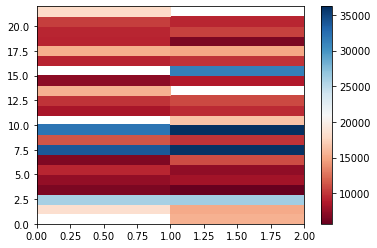

In [190]:
plt.pcolor(df_pivot, cmap='RdBu')
plt.colorbar()
plt.show
# wrong output

### Correlation

(0.0, 47537.44046458354)

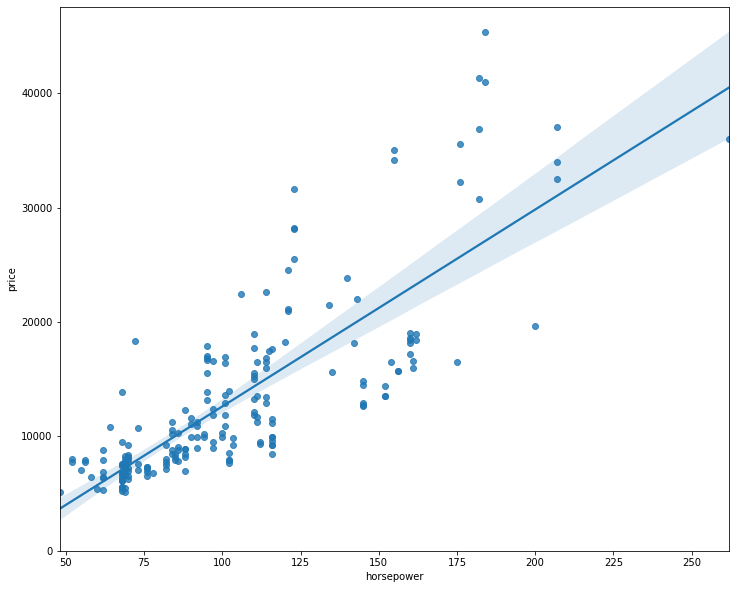

In [247]:
import seaborn as sns

width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='horsepower', y='price', data=df)
plt.ylim(0,)
# there is a positive correlation (positive linear relationship) between horsepower and price

(0.0, 48170.55751128996)

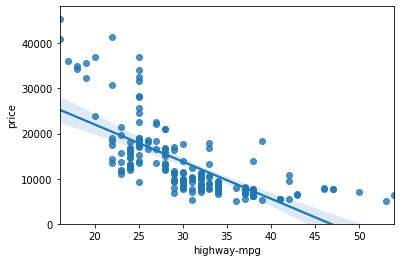

In [192]:
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)
# there is a negative correlation (negative linear relationship) between hyghway-mpg and price

(0.0, 47414.1)

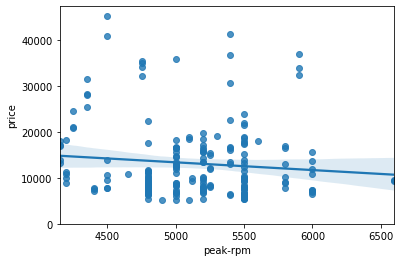

In [193]:
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)
# there is a weak correlation (weak linear relationship) between peak-rpm and price

### Pearson Correlation

### Correlation Heatmap

### Simple Linear Regression

In [194]:
X = df[["highway-mpg"]]
Y = df[["price"]]

In [195]:
lm = LinearRegression().fit(X, Y)

In [196]:
lm.coef_

array([[-821.73337832]])

In [197]:
lm.intercept_

array([38423.30585816])

In [221]:
Yhat = lm.predict(X) #the output is an array

In [246]:
dataset = pd.DataFrame({'predicted price': Yhat[:,0]}) #transform the array in dataframe
dataset[0:5]

,predicted price
0,16236.504643
1,16236.504643
2,17058.238022
3,13771.304508
4,20345.171535


### Multiple Linear Regression

In [200]:
Z = df[["horsepower", "curb-weight", "engine-size", "highway-mpg"]]
Y = df[["price"]]

In [201]:
lm_1 = LinearRegression().fit(Z, Y) #.fit to train the model

In [202]:
lm_1.coef_

array([[53.61042729,  4.70886444, 81.47225667, 36.39637823]])

In [203]:
lm_1.intercept_

array([-15824.03820823])

In [219]:
Yhat_1 = lm_1.predict(Z)

In [223]:
dataset = pd.DataFrame({'predicted price': Yhat_1[:,0]})
dataset

,predicted price
0,13699.001388
1,13699.001388
2,19055.180751
3,10621.208891
4,15519.941331
...,...
196,16694.805105
197,19508.455476
198,20474.675839
199,17803.263411


### Residual Plot

Curvature value :

<AxesSubplot:xlabel='highway-mpg', ylabel='price'>

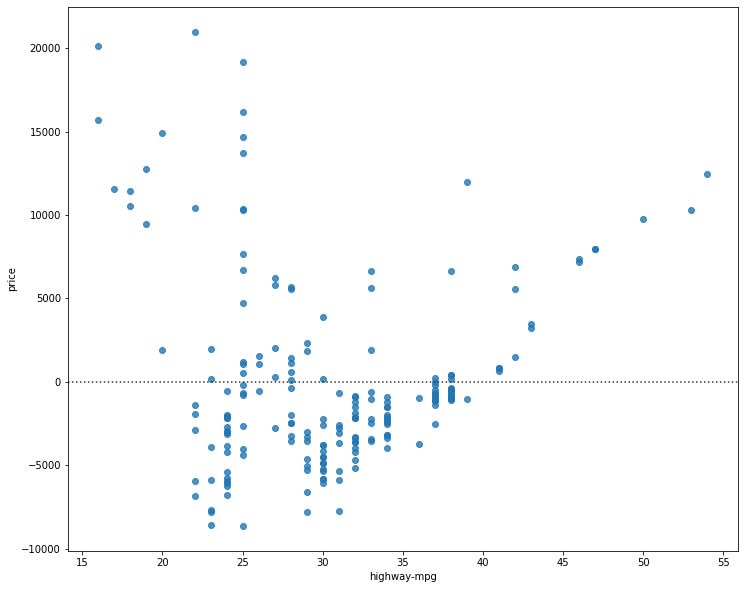

In [248]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df["highway-mpg"], df["price"])

<AxesSubplot:xlabel='engine-size', ylabel='price'>

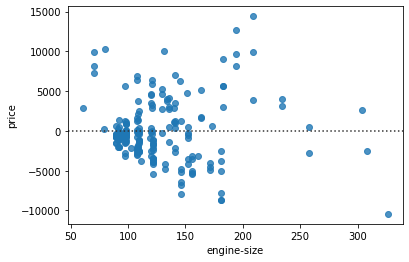

In [207]:
sns.residplot(df["engine-size"], df["price"])

<AxesSubplot:xlabel='horsepower', ylabel='price'>

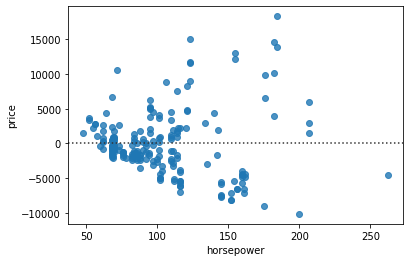

In [208]:
sns.residplot(df["horsepower"], df["price"])

### Distribution Plot

With one independent variable (Yhat) :

<AxesSubplot:xlabel='price'>

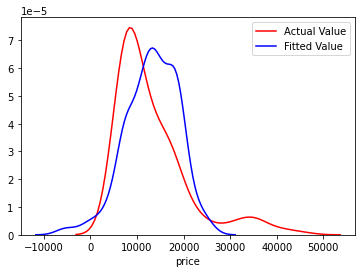

In [209]:
ax_1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Value', ax= ax_1)

With four independent variables (Yhat_1) :

<AxesSubplot:xlabel='price'>

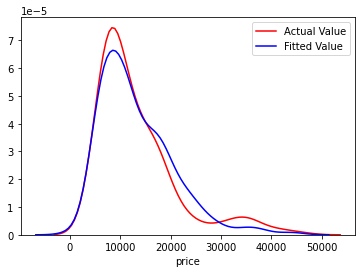

In [210]:
ax_1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat_1, hist=False, color='b', label='Fitted Value', ax= ax_1)

### Polynomial Regression 1Dimension

Calculate Polynomial Regression of 3rd order with "polyfit" :

In [211]:
X_1 = df["highway-mpg"]
Y_1 = df["price"]

In [212]:
f = np.polyfit(X_1, Y_1, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


### Polynomial Regression XDimensions (ex: 2D with degree = 2)

Calculate Polynomial Regression of several dimensions with "preprocessing" library from sickit-learn library, to normalize features :

In [230]:
pr = PolynomialFeatures(degree=2, include_bias=False)
pr.fit_transform(X)

array([[  27.,  729.],
       [  27.,  729.],
       [  26.,  676.],
       [  30.,  900.],
       [  22.,  484.],
       [  25.,  625.],
       [  25.,  625.],
       [  25.,  625.],
       [  20.,  400.],
       [  29.,  841.],
       [  29.,  841.],
       [  28.,  784.],
       [  28.,  784.],
       [  25.,  625.],
       [  22.,  484.],
       [  22.,  484.],
       [  20.,  400.],
       [  53., 2809.],
       [  43., 1849.],
       [  43., 1849.],
       [  41., 1681.],
       [  38., 1444.],
       [  30.,  900.],
       [  38., 1444.],
       [  38., 1444.],
       [  38., 1444.],
       [  30.,  900.],
       [  30.,  900.],
       [  24.,  576.],
       [  54., 2916.],
       [  38., 1444.],
       [  42., 1764.],
       [  34., 1156.],
       [  34., 1156.],
       [  34., 1156.],
       [  34., 1156.],
       [  33., 1089.],
       [  33., 1089.],
       [  33., 1089.],
       [  33., 1089.],
       [  28.,  784.],
       [  31.,  961.],
       [  29.,  841.],
       [  2

To normalize/transform each features simultaneously :

In [214]:
scale = StandardScaler().fit(df[["horsepower", "engine-size", "highway-mpg"]])
x_scale = scale.transform(df[["horsepower", "engine-size", "highway-mpg"]])

dataset_1 = pd.DataFrame({'horsepower': x_scale[:,0], 'engine-size': x_scale[:,1], 'highway-mpg': x_scale[:,2]})
dataset_1

,horsepower,engine-size,highway-mpg
0,0.203984,0.075389,-0.542288
1,0.203984,0.075389,-0.542288
2,1.357649,0.606234,-0.689386
3,-0.037480,-0.431327,-0.100993
4,0.311302,0.220165,-1.277779
...,...,...,...
196,0.284473,0.340812,-0.395189
197,1.518625,0.340812,-0.836484
198,0.821061,1.112950,-1.130681
199,0.069837,0.437329,-0.542288


### Pipeline

We can simplify the code using Pipeline method :

In [215]:
input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(degree=2)), ('mode', LinearRegression())]
pipe = Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

We can train the model :

In [216]:
pipe.fit(Z, Y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('mode', LinearRegression())])

Predict the value of price :

In [217]:
Yhat_2 = pipe.predict(Z)

dataset_2 = pd.DataFrame({'price': Yhat_2[:,0]})
dataset_2

,price
0,13103.377450
1,13103.377450
2,18228.500455
3,10392.955633
4,16133.768744
...,...
196,14751.219204
197,18029.680069
198,19826.479169
199,17324.742444


### Mean Square Error

In [235]:
mean_squared_error(Y, Yhat) #Y = df['price'] and Yhat = predicted value of price

31635042.944639888

In [243]:
mean_squared_error(Y, Yhat_1)

11976801.681229586

### R-squared

In [234]:
lm.score(X, Y)

0.4965911884339176

### Predict the value of "price"

With lm ("highway-mpg vs price") :

In [238]:
lm.predict(np.array(30.0).reshape(-1, 1))

array([[13771.3045085]])

Generate a sequence of values in a specified range :

In [240]:
new_input = np.arange(1, 101, 1).reshape(-1, 1)

In [241]:
Yhat_3 = lm.predict(new_input)

dataset_3 = pd.DataFrame({'predicted price': Yhat_3[:,0]})
dataset_3

,predicted price
0,37601.572480
1,36779.839102
2,35958.105723
3,35136.372345
4,34314.638967
...,...
95,-40463.098461
96,-41284.831839
97,-42106.565217
98,-42928.298596
